# Descubra as melhores notas de matemática do ENEM 2016

Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016. Para isso, usará Python, Pandas, Sklearn e Regression.



## Tópicos

Neste desafio você aprenderá:

- Python
- Pandas
- Sklearn
- Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [5]:
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [6]:
train.drop(columns = ['Unnamed: 0'], inplace = True)

In [7]:

train_features = ['NU_INSCRICAO',
                  'NU_NOTA_CN',
                  'NU_NOTA_CH',
                  'NU_NOTA_LC',
                  'NU_NOTA_COMP1',
                  'NU_NOTA_COMP2',
                  'NU_NOTA_COMP3', 
                  'NU_NOTA_COMP4',
                  'NU_NOTA_COMP5',
                  'NU_NOTA_REDACAO',
                  'NU_NOTA_MT'] 

test_features = ['NU_NOTA_CN',
                 'NU_NOTA_CH',
                 'NU_NOTA_LC',
                 'NU_NOTA_REDACAO',
                 'NU_NOTA_COMP1',
                 'NU_NOTA_COMP2',
                 'NU_NOTA_COMP3',
                 'NU_NOTA_COMP4',
                 'NU_NOTA_COMP5']

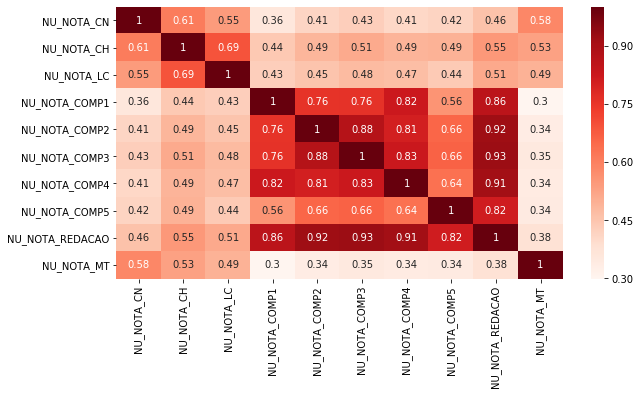

In [12]:
%matplotlib inline

corr = train[train_features].corr()
plt.subplots(figsize = (10, 5))
sns.heatmap(corr, annot = True, annot_kws = {"size": 10}, linecolor= 'black', cmap= 'Reds')

In [13]:
train[train_features] = train[train_features].fillna(0) 
test[test_features] = test[test_features].fillna(0)

In [14]:
y_train = train['NU_NOTA_MT']

x_train = train[test_features]
x_test = test[test_features]

In [15]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test) 

In [16]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = reg.predict(x_test)

result = pd.DataFrame()
result['NU_INSCRICAO'] = test['NU_INSCRICAO']
result['NU_NOTA_MT'] = np.around(y_pred, 2)

result.to_csv('answer.csv', index = False, header = True)